<h1 
    style="
    color:blue;
    text-transform: capitalize;
    text-align: center;
     ">
   Data Wrangling With Baltimore City 911 Report Data 
</h1>

> You are just hired as a data analyst for a non-profit organization in Baltimore called “Safe
Neighbourhood” which specializes in using data-driven insights to support initiatives to improve
safety assurance for residents and visitors. On the first day of your job, you are invited to attend
a meeting with Chief Safety Officer Gary who is a retired police officer. He brings your attention
to an interesting publicly available dataset curating the 911 calls reports in the last decade. He
is interested to see whether you could help him to turn those data into useful insights to (1) help
the police department to decide on where and when to deploy resources; (2) provide safety
advisory to residents/visitors on the likelihood of crime and types of crime at given time and
given location. As the first step to solving this problem, you decide to do some exploratory data
analysis to identify some interesting patterns to discuss with Gary in the next meeting. 

In [1]:
# Ignore all Warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Import all Python data analysis, visualization, and machine learning modules.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd             
import numpy as np              
import graphviz
import joblib
import pandas_profiling as pp
from skimpy import skim
from dataprep.eda import *
from dataprep.datasets import load_dataset
from dataprep.eda import plot, plot_correlation, plot_missing, plot_diff, create_report

%matplotlib inline

ModuleNotFoundError: No module named 'graphviz'

In [9]:
#Import Data with Pandas
df = pd.read_csv('VictimBasedCrimeData.csv')

#Display the tables in the imported data
df.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
0,02/08/2020,2:18:00,5D,1700 CLIFTVIEW AVE,BURGLARY,I,NaN,312.0,EASTERN,DARLEY PARK,-76.593870,39.315341,NaN,GROCERY/CONFECTION,Eastern 1,1
1,02/08/2020,6:00:00,6G,700 N STREEPER ST,LARCENY,I,NaN,333.0,EASTERN,MADISON EASTEND,-76.577425,39.299094,NaN,ROW/TOWNHOUSE-OCC,NaN,1
2,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
3,02/08/2020,9:50:00,3JF,1400 N BROADWAY,ROBBERY - RESIDENCE,I,FIREARM,314.0,EASTERN,OLIVER,-76.594992,39.306941,NaN,ROW/TOWNHOUSE-OCC,NaN,1
4,02/08/2020,17:30:00,5A,1600 E OLIVER ST,BURGLARY,I,NaN,314.0,EASTERN,OLIVER,-76.595946,39.307350,NaN,ROW/TOWNHOUSE-OCC,Eastern 1,1


In [10]:
df_int = df[['Longitude', 'Latitude', 'Location 1', 'Total Incidents']]
df_str = df[['CrimeDate', 'CrimeTime', 'CrimeCode', 'Location', 'Description', 'Inside/Outside', 'Weapon', 'Post']]

In [5]:
df.shape

(292761, 16)

In [11]:
df.dtypes

CrimeDate           object
CrimeTime           object
CrimeCode           object
Location            object
Description         object
Inside/Outside      object
Weapon              object
Post                object
District            object
Neighborhood        object
Longitude          float64
Latitude           float64
Location 1         float64
Premise             object
vri_name1           object
Total Incidents      int64
dtype: object

In [12]:
# Data Cleaning
for col in df:
    df[col].replace(np.nan, 0, inplace=True)
    print(df[col].unique())

['02/08/2020' '02/07/2020' '02/06/2020' ... '06/01/1975' '07/20/1969'
 '10/30/1963']
['2:18:00' '6:00:00' '9:50:00' ... '22:26:39' '13:38:52' '1:52:27']
['5D' '6G' '3JF' '5A' '7A' '6E' '3CF' '3AF' '6J' '4E' '6B' '9S' '6C' '4C'
 '4A' '4B' '6D' '3JK' '3AK' '5C' '3AJF' '1A' '4D' '5E' '3CO' '6L' '3B'
 '3K' '3D' '3GF' '3AO' '5B' '3F' '3JO' '6H' '6F' '7C' '2A' '6A' '3EO' '3P'
 '5G' '3AJO' '3CK' '3BJ' '3NF' '5F' '7B' '2B' '3GO' '3H' '8EV' '3AJK' '1O'
 '1K' '8H' '3M' '3EF' '8FO' '8AO' '8EO' '8AV' '8J' '3NK' '3GK' '3LF' '3NO'
 '3LO' '8BV' '8GV' '8GO' '8BO' '6K' '8I' '3EK' '8FV' '3LK' '8CO' '8CV'
 '8DO' '3N']
['1700 CLIFTVIEW AVE' '700 N STREEPER ST' '1400 N BROADWAY' ...
 '1100 POTOMAC STREET' '3700 MOUNT PLEASEANT' '900 DENISON']
['BURGLARY' 'LARCENY' 'ROBBERY - RESIDENCE' 'AUTO THEFT'
 'ROBBERY - COMMERCIAL' 'ROBBERY - STREET' 'COMMON ASSAULT' 'SHOOTING'
 'AGG. ASSAULT' 'LARCENY FROM AUTO' 'ROBBERY - CARJACKING' 'HOMICIDE'
 'RAPE' 'ARSON']
['I' 'O' 'Outside' 0 'Inside']
[0 'FIREARM' 'OTHER' '

In [16]:
# Dashboard
import numpy as np
import pandas as pd
import pandas_profiling as pp
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
# Charts
plot(df_str)

plot_missing(df_str)
plot_missing(df_str, "CrimeDate")

NameError: name 'plot' is not defined

In [18]:
# Skim Charts
skim(df_int)

NameError: name 'skim' is not defined

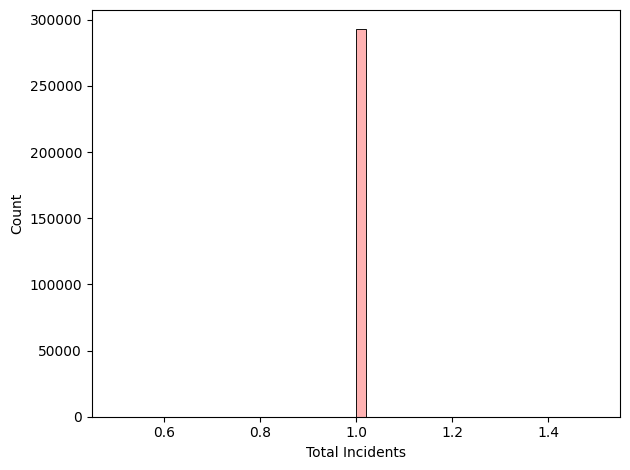

In [11]:
# Series Charts
sns.histplot(df_int['Total Incidents'], alpha=0.3, kde=True, 
             bins=int(50), color = 'red',
             line_kws={'linewidth': 4})

plt.tight_layout()
plt.show();

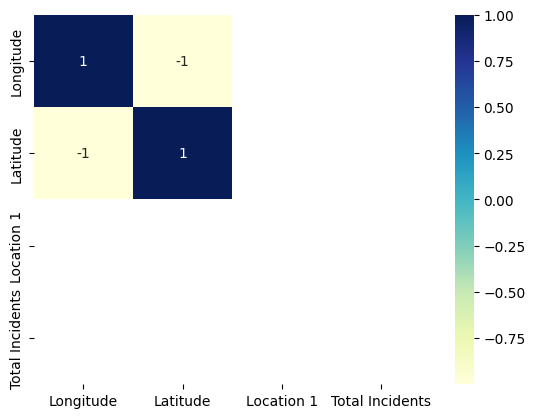

In [12]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

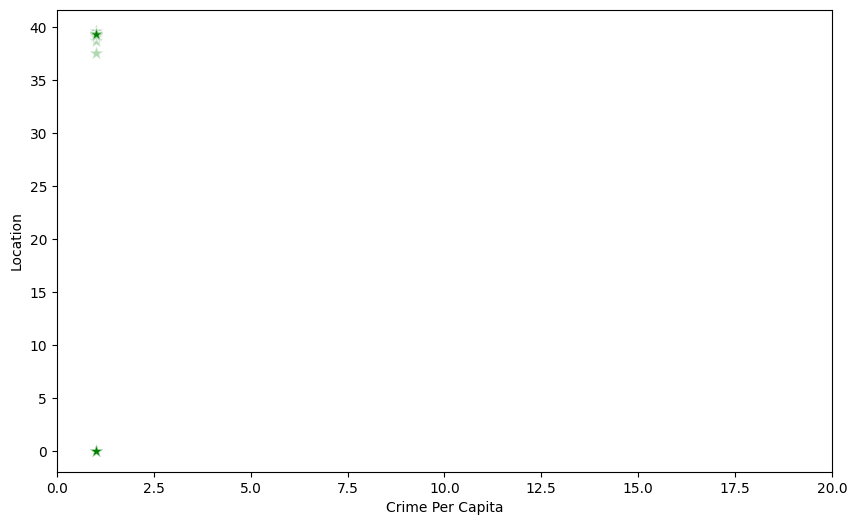

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

ax = sns.scatterplot(
    x=df['Total Incidents'],
    y=df['Latitude'],
    color='green',                                                 # set color of marker
    marker='*',                                                    # set type of marker
    s=100,                                                         # set size of market
    alpha=0.3,                                                     # set color opacity
)

ax.set_xlabel('Crime Per Capita')
ax.set_xlim(0, 20)
ax.set_ylabel('Location');

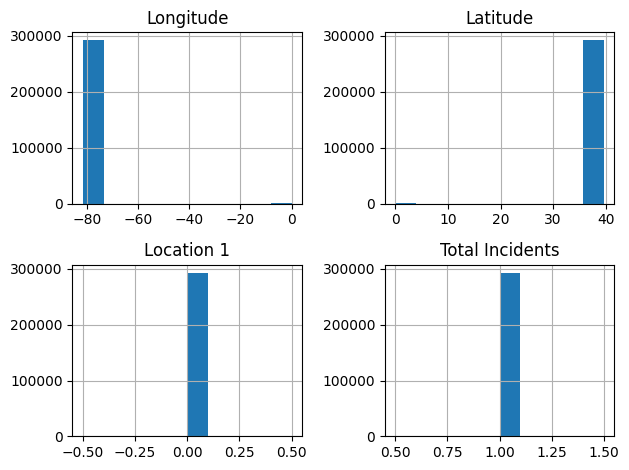

In [14]:
# Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations; 
df.hist()
plt.tight_layout();

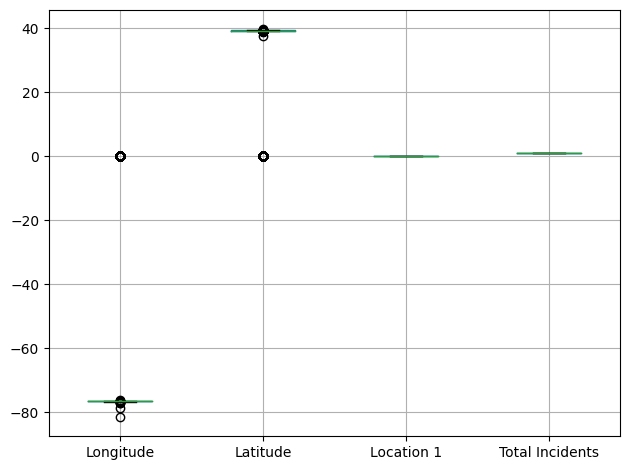

In [15]:
# Generate a plot describing the distribution of crime type aggregating from all geolocations and all time periods
df.boxplot()
plt.tight_layout();

In [19]:
# Charts
plot(df_str)

plot_missing(df_str)
plot_missing(df_str, "Location")

NameError: name 'plot' is not defined

<AxesSubplot:xlabel='Description', ylabel='count'>

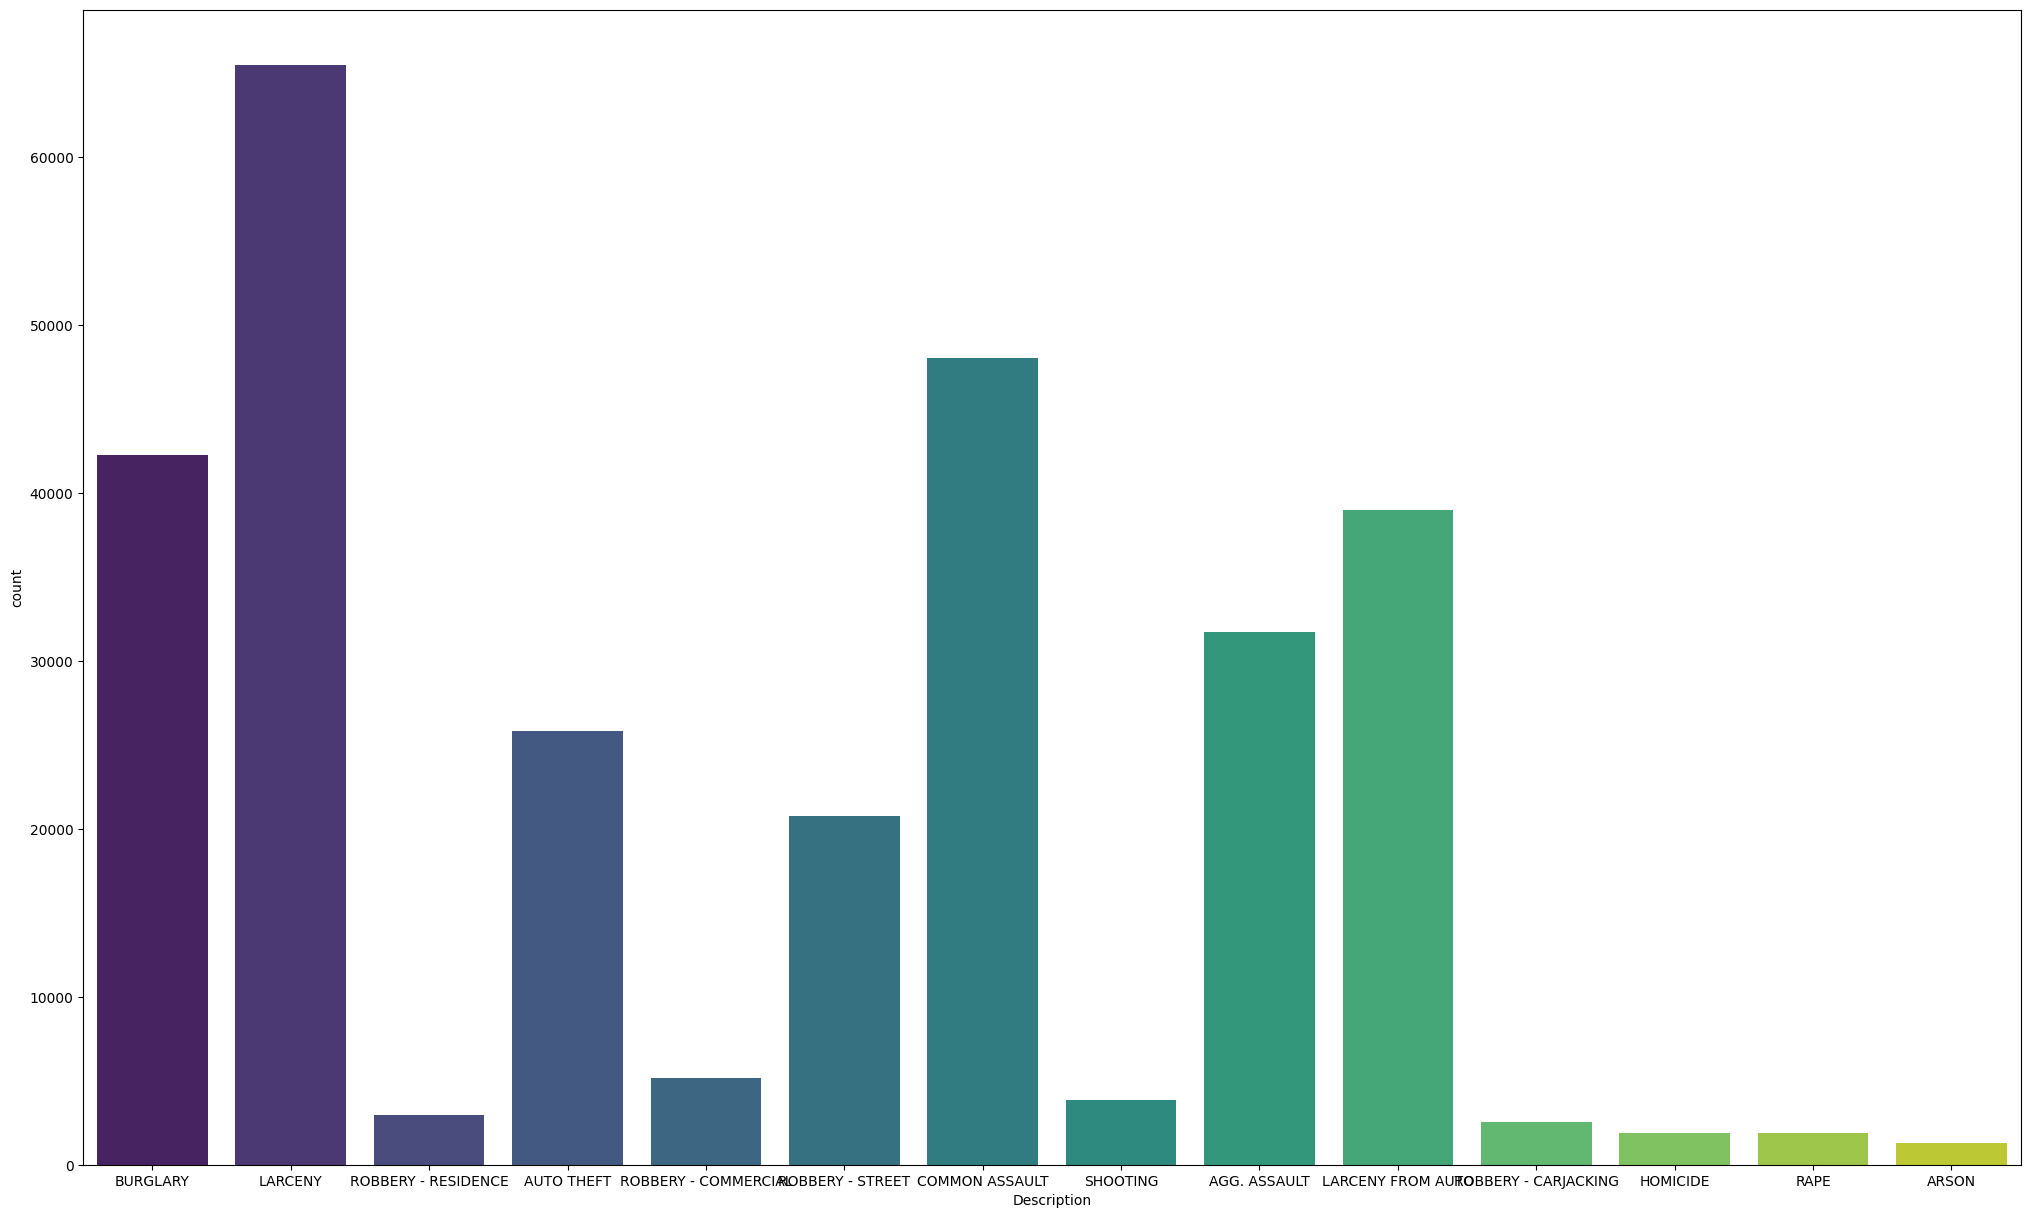

In [30]:
import seaborn as sns
plt.figure(figsize=(25,15))
sns.countplot(x='Description',data=df,palette='viridis')

In [31]:
df['CrimeDate'].iloc[0]

'02/08/2020'

In [33]:
df['CrimeDate']=pd.to_datetime(df['CrimeDate'])

In [34]:
time=df['CrimeDate'].iloc[0]
df['Hour']=df['CrimeDate'].apply(lambda time:time.hour)
df['Month']=df['CrimeDate'].apply(lambda time:time.month)
df['Day of Week']=df['CrimeDate'].apply(lambda time:time.dayofweek)

In [35]:
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

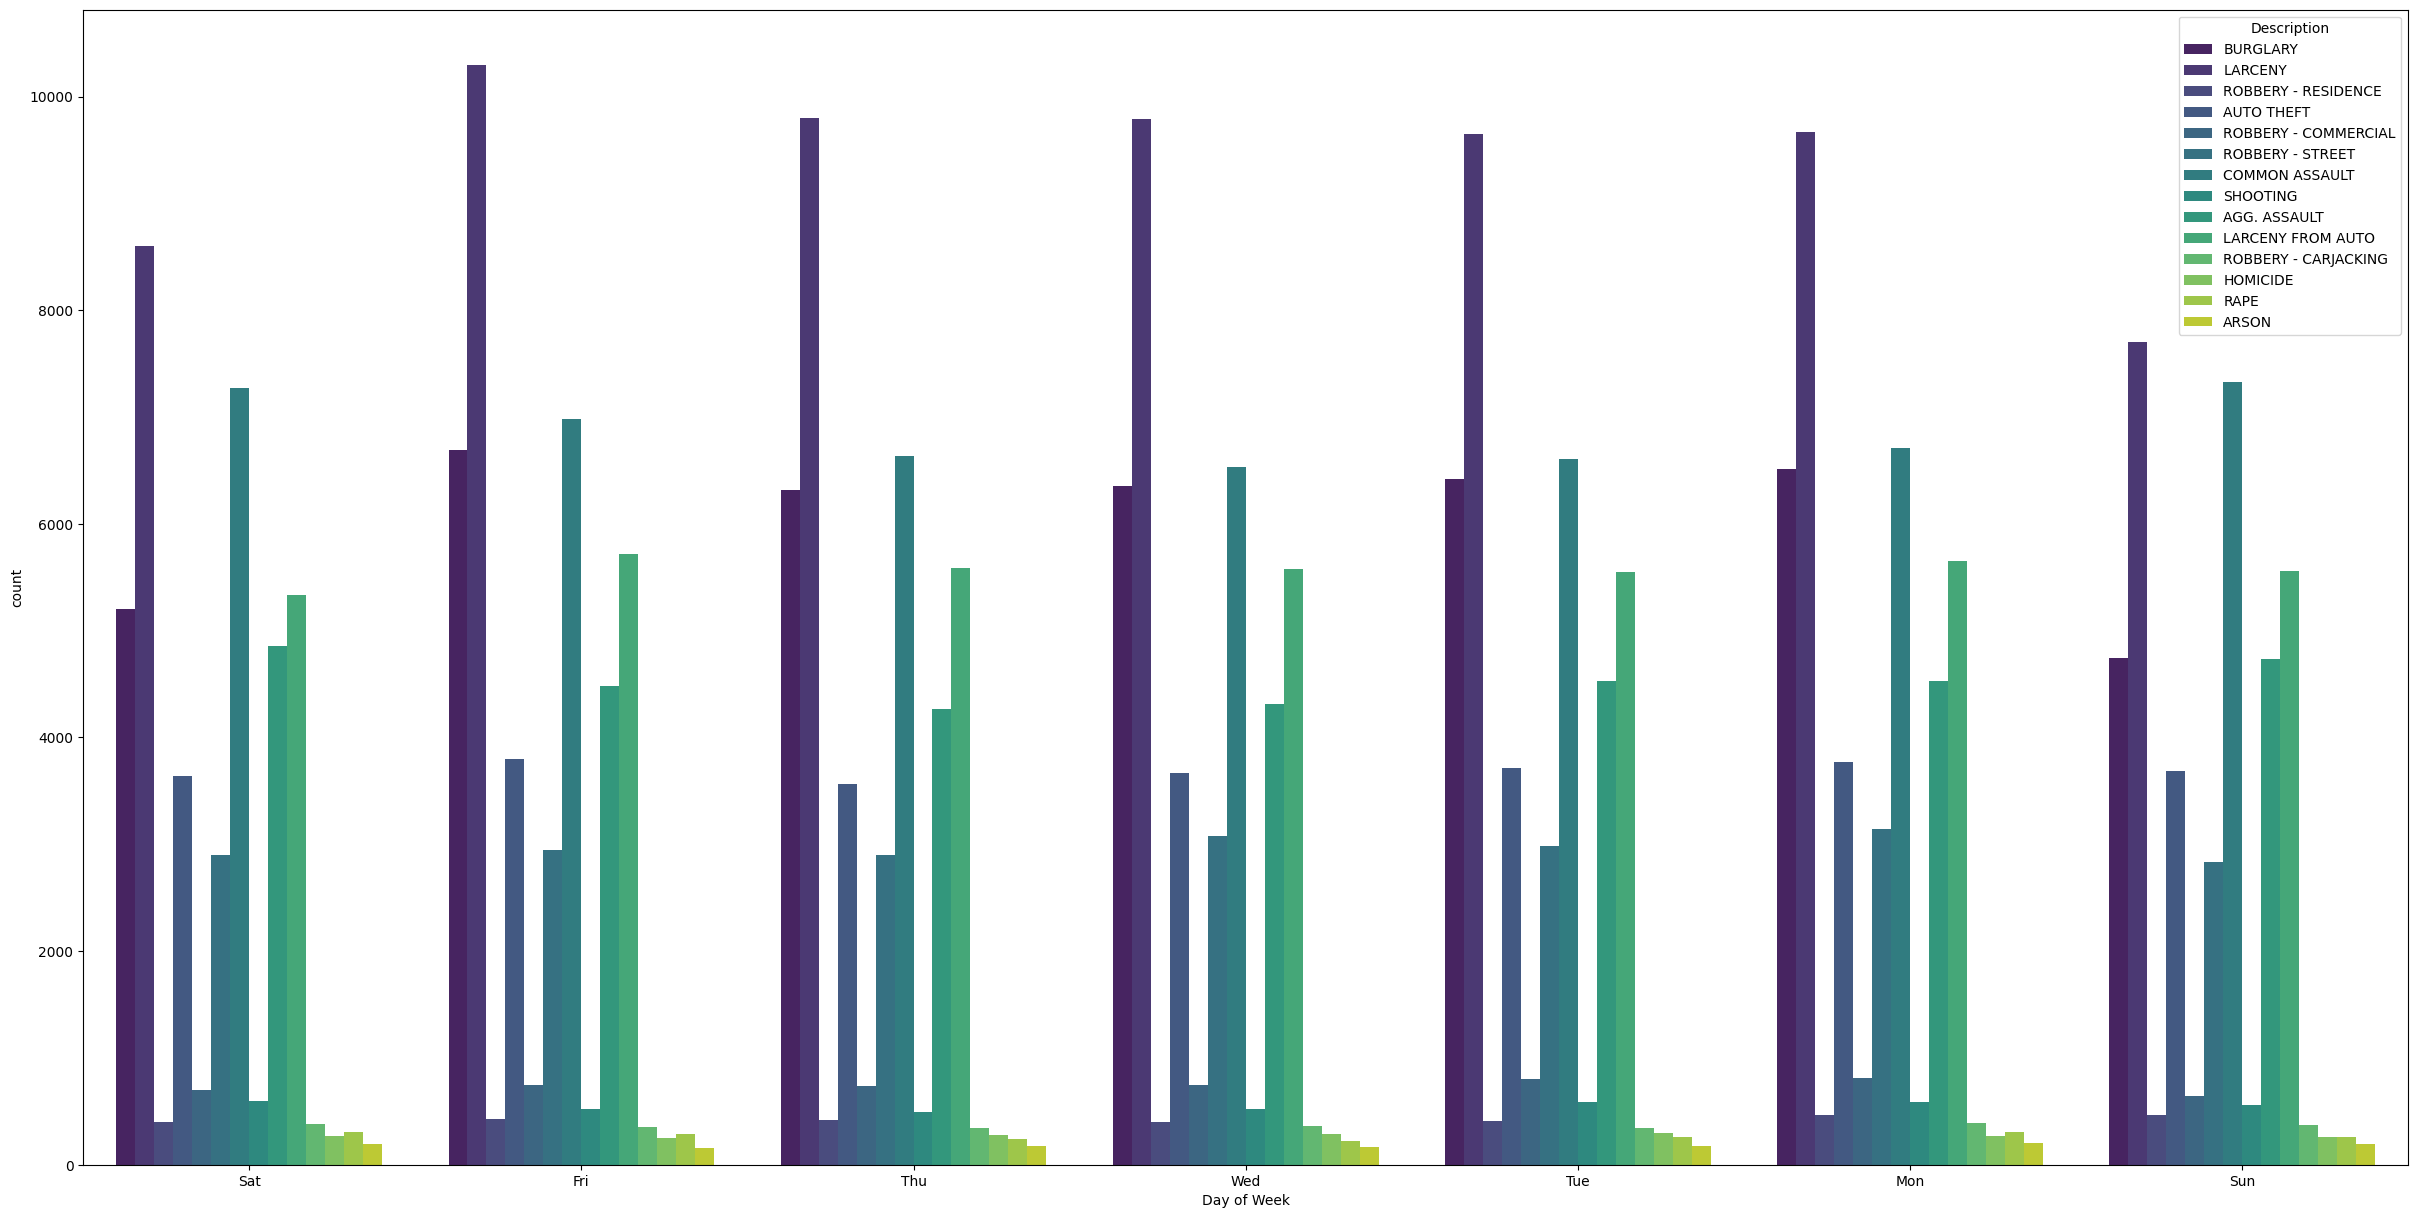

In [40]:
#crime types distributions by day-of-week
plt.figure(figsize=(30,15))
sns.countplot(x='Day of Week',data=df,hue='Description',palette='viridis')

<AxesSubplot:xlabel='Month', ylabel='count'>

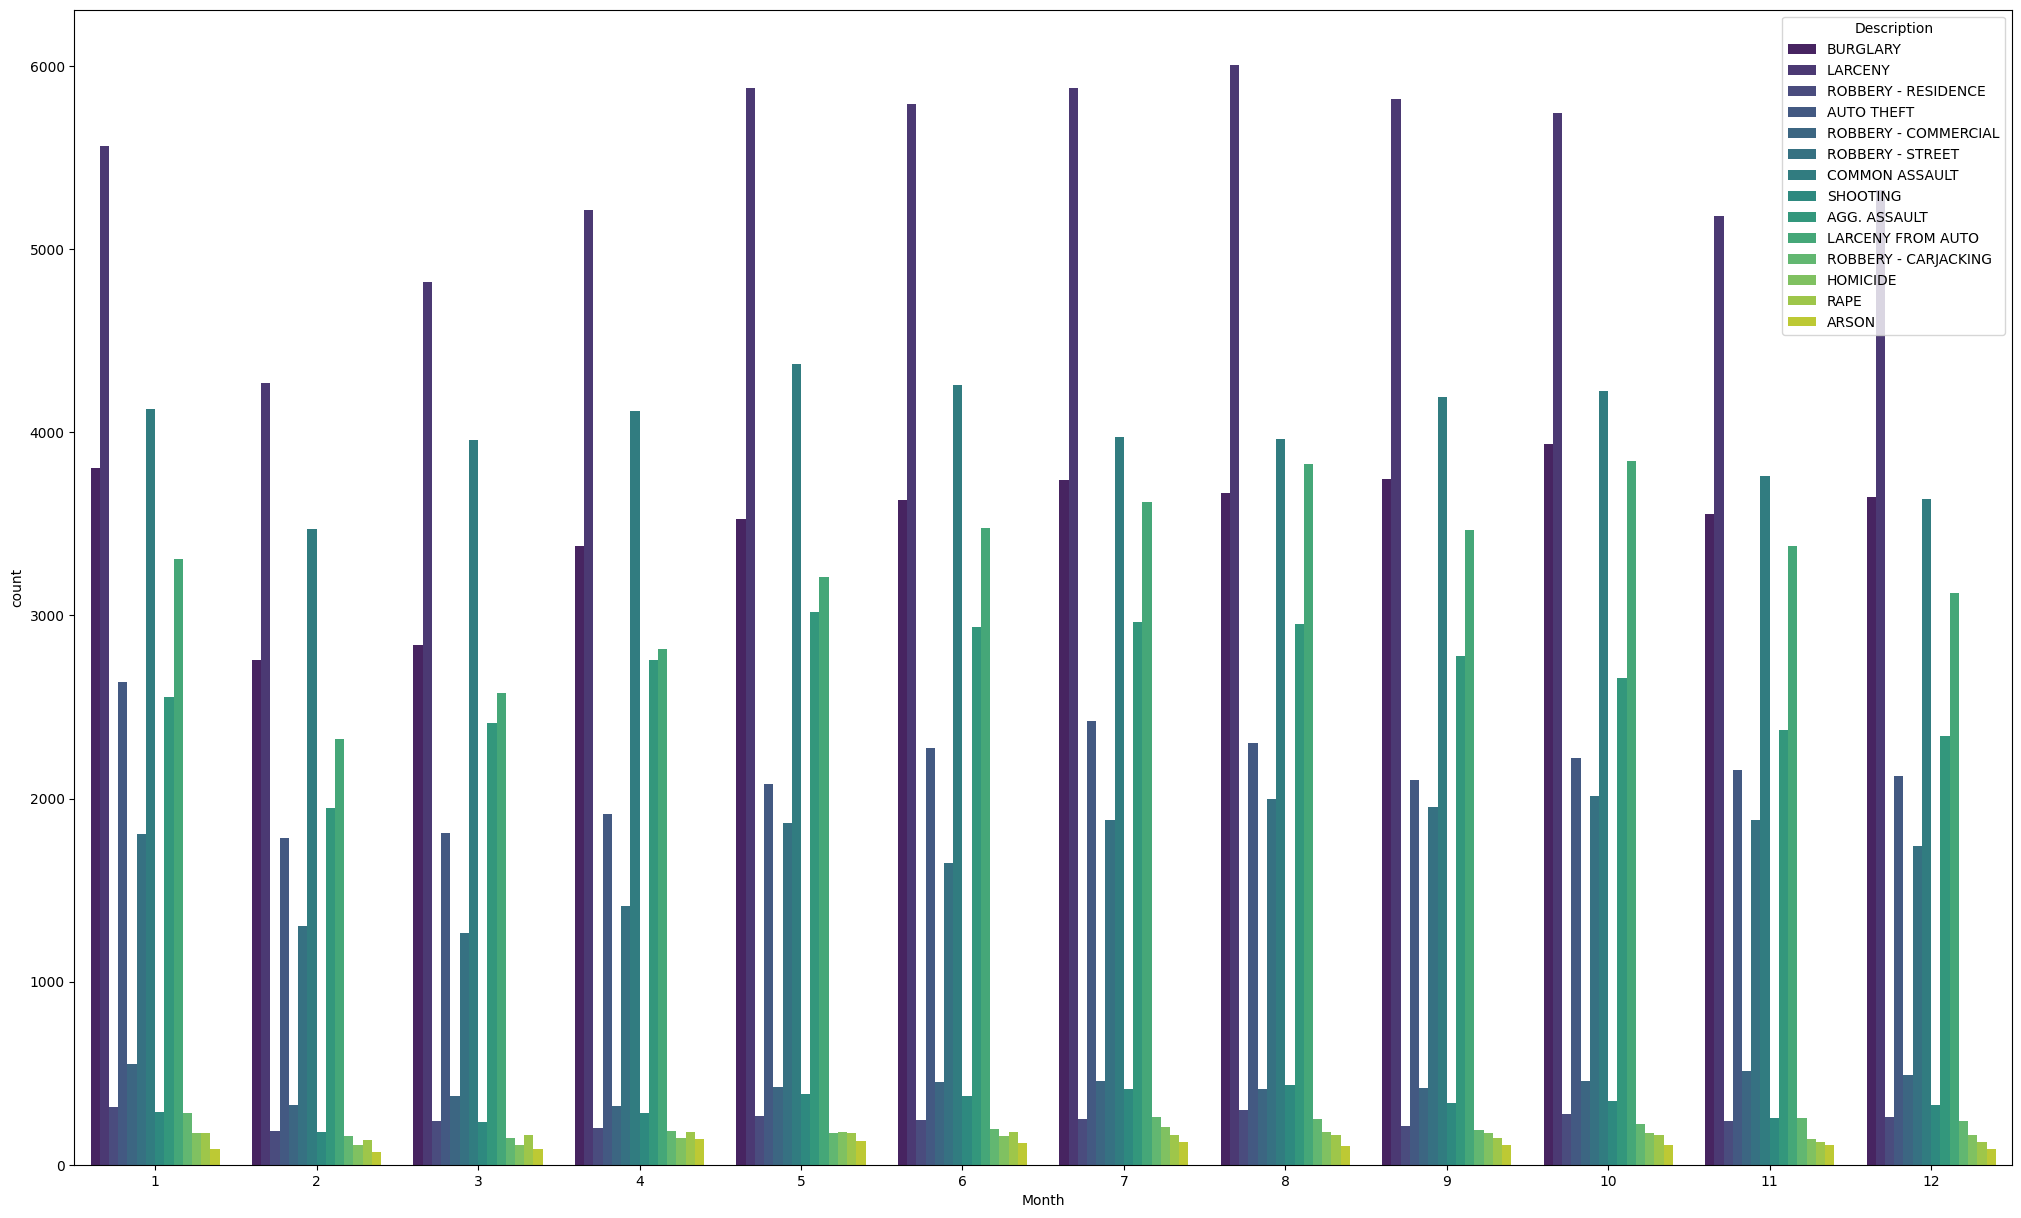

In [44]:
#crime ypes distribution by month
plt.figure(figsize=(25,15))
sns.countplot(x='Month',data=df,hue='Description',palette='viridis')

In [45]:
byMonth=df.groupby('Month').count()
byMonth.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents,Hour,Day of Week
Month,,,,,,,,,,,,,,,,,,
1,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680,25680
2,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023,19023
3,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036,21036
4,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065,23065
5,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692,25692


<AxesSubplot:xlabel='Month'>

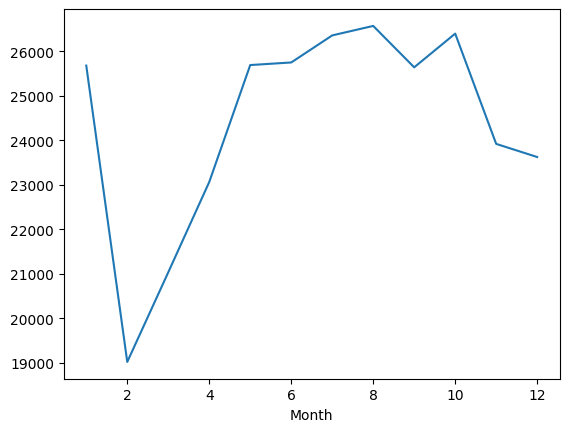

In [48]:
byMonth['Neighborhood'].plot()

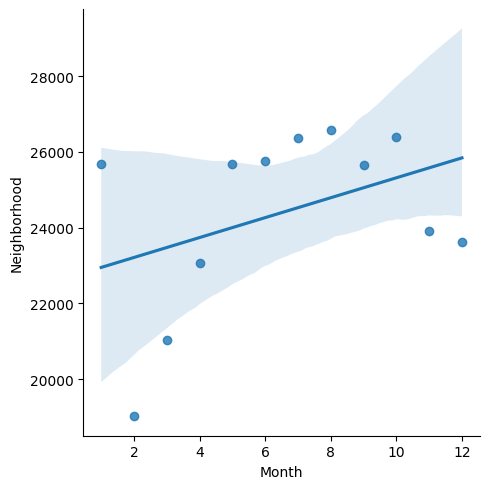

In [52]:
sns.lmplot(x='Month',y='Neighborhood',data=byMonth.reset_index())